<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/08_Tasseled_Cap_Transformation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 08 Tasseled Cap Transformation</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` and ```rasterio``` you can do it with the following line:

In [ ]:
!pip install scikeo rasterio

Libraries to be used:

In [ ]:
import rasterio
import numpy as np
from scikeo.tassCap import tassCap
import matplotlib.pyplot as plt

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2.0 Optical image

Landsat-8 OLI (Operational Land Imager) will be used. This image, which is in TOA reflectance, contain bands:
- Blue -> B2
- Green -> B3
- Red -> B4
- Nir -> B5
- Swir1 -> B6
- Swir2 -> B7

The images to be used can be downloaded [here](https://drive.google.com/drive/folders/1y303wMTsSXbpAmPJK_6q1AmlWROgVHN-?usp=sharing):

In [ ]:
path_optical = r"F:\RepositoriosGitHub\scikit-eo-tutorials\data\05_tct\LC08_232066_20210716_TOA.tif"
img = rasterio.open(path_optical)

## 3.0 Results

Applying the ```tassCap``` function:

In [ ]:
arr_tct = tassCap(image = img, sat = 'Landsat8OLI')

Preparing the image:

In [ ]:
# Normalizing fractions
def stretch_percentiles(arr):
    p10 = np.percentile(arr, 10) # percentile10
    p90 = np.percentile(arr, 90) # percentile90
    clipped_arr = np.clip(arr, p10, p90)
    img = (clipped_arr - p10)/(p90 - p10)
    return img

arr_tct = stretch_percentiles(arr_tct)

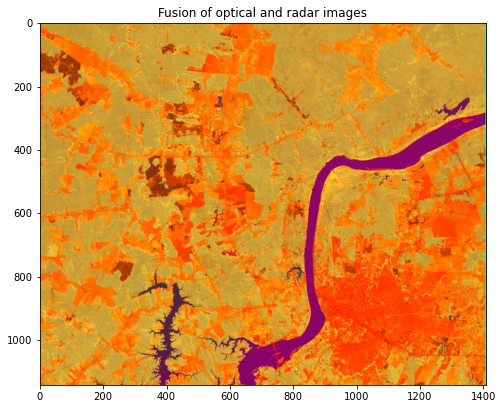

In [ ]:
# Let´s plot
fig, axes = plt.subplots(figsize = (8, 8))
axes.imshow(arr_tct)
axes.set_title("Fusion of optical and radar images")
axes.grid(False)